In [131]:
# Import file
import pandas as pd
df = pd.read_csv('./Drivers/OVAseq_old-tech_drivers_VC_10.txt', sep= '\t')

# Adding columns to the dataframe
df["end_Pos"]=""

In [132]:
len(df)

484

In [133]:
df_final = df

In [134]:
# Removing variants at MS regions
eliminated = pd.DataFrame()
with open('MS_regions.txt', 'r') as ms_regions:
    for line in ms_regions:
        ms = line.strip()
        chrom = ms.split(':')[0]
        pos = ms.split(':')[1]
        pos1 = pos.split('-')[0]
        pos2 = pos.split('-')[1]
        eliminated = eliminated.append(df_final[(df_final['Chrom']==str(chrom)) & (df_final['Pos']>= int(pos1)) & (df_final['Pos']<= int(pos2))])
        df_final = df_final.drop(df_final.index[(df_final['Chrom']==str(chrom)) & (df_final['Pos']>= int(pos1)) & (df_final['Pos']<= int(pos2))])


In [136]:
eliminated.to_csv("./Drivers/Eliminated_variants_old.txt", sep = "\t", index=False)

In [137]:
df_final = pd.read_csv('./Drivers/Eliminated_variants_old.txt', sep= '\t')

In [138]:
len(df_final)
#d_final

18

In [139]:
# Adding values to the end_Pos column
for i in df_final.index:
    if (df_final["VARIANT_CLASS"][i]=="SNV") | (df_final["VARIANT_CLASS"][i]=="insertion"):
        df_final.at[i,"end_Pos"]=float(df_final.at[i,"Pos"])
    else:
        df_final.at[i,"end_Pos"]=float(df_final.at[i,"Pos"] + float(len(str(df_final.at[i,"Ref"]))) -1.0)

In [140]:
df_final = df_final.drop(df_final.index[(df_final['Existing_variation'].isna()) & (df_final['IMPACT'] == "MODERATE")])
#df_final = df_final.drop(df_final.index[(df_final['Existing_variation'] == "") & (df_final['Cosmic'] == ".")
#                                        & (df_final['Clinvar'] == ".") & (df_final['MSKCC'] == ".") 
#                                        & (df_final['IMPACT'] == "MODERATE")])
#df_final = df_final.drop(df_final.index[(df_final['SOMATIC']=='benign')])
#df_final = df_final.drop(df_final.index[(df_final['SOMATIC']=='likely_benign')])
#df_final = df_final.drop(df_final.index[(df_final['SOMATIC']=='benign/likely_benign&likely_benign&uncertain_significacne')])
#df_final = df_final.drop(df_final.index[(df_final['SOMATIC']=='benign/likely_benign&likely_benign')])
#df_final = df_final.drop(df_final.index[(df_final['SOMATIC']=='benign&likely_benign')])#

In [141]:
### Printing df ###
df_final

,Chrom,Pos,Ref,Alt,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,...,AF,AD,DP,key,sampleID,OVAseq,Run,Nsamples,Prevalence,end_Pos
0,chr3,183665257,A,-,-,frameshift_variant,HIGH,ABCC5,ENSG00000114770,Transcript,...,0.286,163,570,chr3:183665257:A:-,LP18,OVAseq_1,Run1,1,0.016667,183665257.0
1,chr4,56336954,A,-,-,frameshift_variant,HIGH,CLOCK,ENSG00000134852,Transcript,...,0.431,28,65,chr4:56336954:A:-,LP30,2,Run2,1,0.016667,56336954.0
2,chr16,4862229,-,C,C,frameshift_variant,HIGH,GLYR1,ENSG00000140632,Transcript,...,0.300,162,540,chr16:4862229:-:C,LP18,OVAseq_1,Run1,1,0.016667,4862229.0
3,chr7,151874148,T,-,-,frameshift_variant,HIGH,KMT2C,ENSG00000055609,Transcript,...,0.447,55,123,chr7:151874148:T:-,LP18,OVAseq_1,Run1,1,0.016667,151874148.0
4,chr5,79970915,A,-,-,frameshift_variant,HIGH,MSH3,ENSG00000113318,Transcript,...,0.418,51,122,chr5:79970915:A:-,LP18,OVAseq_1,Run1,1,0.016667,79970915.0
5,chr18,18533679,T,-,-,frameshift_variant,HIGH,ROCK1,ENSG00000067900,Transcript,...,0.433,26,60,chr18:18533679:T:-,LP30,2,Run2,1,0.016667,18533679.0
6,chr1,27621108,G,-,-,frameshift_variant,HIGH,WDTC1,ENSG00000142784,Transcript,...,0.333,37,111,chr1:27621108:G:-,LP18,OVAseq_1,Run1,2,0.033333,27621108.0
7,chr1,27621108,G,-,-,frameshift_variant,HIGH,WDTC1,ENSG00000142784,Transcript,...,0.383,36,94,chr1:27621108:G:-,LP30,2,Run2,2,0.033333,27621108.0
8,chr17,48433967,C,-,-,frameshift_variant,HIGH,XYLT2,ENSG00000015532,Transcript,...,0.146,96,658,chr17:48433967:C:-,LP16,OVAseq_1,Run1,1,0.016667,48433967.0
9,chr3,114058003,G,-,-,frameshift_variant,HIGH,ZBTB20,ENSG00000181722,Transcript,...,0.421,53,126,chr3:114058003:G:-,LP37,2,Run2,1,0.016667,114058003.0


In [142]:
### Saving the dataframe into a new file ###
df_final.to_csv("./Drivers/Eliminated_drivers_old-tech_VC_10.txt", sep = "\t", index=False)
####

In [145]:
import re
data = pd.read_csv("./Drivers/Eliminated_drivers_old-tech_VC_10.txt", sep="\t")
data_plot = pd.DataFrame(columns=['sample', 'chromosome', 'chromosome_start', 'chromosome_end', 
                                  'reference_genome_allele', 'mutated_to_allele', 'genes', 'impact', 
                                  'variant_class', 'Existing_variation', 'Clinical_Significance',
                                  'AD', 'DP', 'AF', 'key', 'Prevalence', 'state'], index=None)
data_plot["sample"]=data["sampleID"]
data_plot["chromosome"]=data["Chrom"]
data_plot["chromosome"]=data_plot["chromosome"].str[3:]
data_plot["chromosome_start"]=data["Pos"].astype(int)
data_plot["chromosome_end"]=data["end_Pos"].astype(int)
data_plot["reference_genome_allele"]=data["Ref"]
data_plot["mutated_to_allele"]=data["Alt"]
data_plot["genes"]=data["SYMBOL"]
data_plot["impact"]=data["IMPACT"]
data_plot["variant_class"]=data["Consequence"]

pattern = "&"
for i in data_plot.index:
    if re.search(pattern, data_plot.at[i, "variant_class"]):
        data_plot.at[i, "variant_class"]=data_plot.at[i, "variant_class"].split("&")[0]
        
data_plot["Existing_variation"]=data["Existing_variation"]
data_plot["Clinical_Significance"]=data["SOMATIC"]
data_plot["AD"]=data["AD"]
data_plot["DP"]=data["DP"]
data_plot["AF"]=data["AF"]
data_plot["key"]=data["key"]
data_plot["Prevalence"]=data["Prevalence"]
data_plot["state"]="MMRp"

In [146]:
msi_samples = ['LP16', 'LP17', 'LP18', 'LP19','LP20', 'LP21', 'LP22', 'LP24', 'LP25', 'LP26', 'LP30', 'LP37',
               'LP124', 'OVE16','OVE31', 'OVE42', 'OVE59', 'OVE64', 'OVE86', '16T131', 'MDA5', 'MDA9', 'MDA15',
               'MDA16-NG', 'MDA16']

In [147]:
for msi in msi_samples:
    if msi in data_plot['sample'].values:
        data_plot.loc[data_plot['sample'] == msi, 'state'] = 'MMRd'

In [148]:
data_plot

,sample,chromosome,chromosome_start,chromosome_end,reference_genome_allele,mutated_to_allele,genes,impact,variant_class,Existing_variation,Clinical_Significance,AD,DP,AF,key,Prevalence,state
0,LP18,3,183665257,183665257,A,-,ABCC5,HIGH,frameshift_variant,rs749943218,NaN,163,570,0.286,chr3:183665257:A:-,0.016667,MMRd
1,LP30,4,56336954,56336954,A,-,CLOCK,HIGH,frameshift_variant,rs369752219,NaN,28,65,0.431,chr4:56336954:A:-,0.016667,MMRd
2,LP18,16,4862229,4862229,-,C,GLYR1,HIGH,frameshift_variant,rs749150409,NaN,162,540,0.300,chr16:4862229:-:C,0.016667,MMRd
3,LP18,7,151874148,151874148,T,-,KMT2C,HIGH,frameshift_variant,rs747256476,pathogenic,55,123,0.447,chr7:151874148:T:-,0.016667,MMRd
4,LP18,5,79970915,79970915,A,-,MSH3,HIGH,frameshift_variant,rs587776701,pathogenic,51,122,0.418,chr5:79970915:A:-,0.016667,MMRd
5,LP30,18,18533679,18533679,T,-,ROCK1,HIGH,frameshift_variant,rs752898741,NaN,26,60,0.433,chr18:18533679:T:-,0.016667,MMRd
6,LP18,1,27621108,27621108,G,-,WDTC1,HIGH,frameshift_variant,rs747972901&COSV60089251,NaN,37,111,0.333,chr1:27621108:G:-,0.033333,MMRd
7,LP30,1,27621108,27621108,G,-,WDTC1,HIGH,frameshift_variant,rs747972901&COSV60089251,NaN,36,94,0.383,chr1:27621108:G:-,0.033333,MMRd
8,LP16,17,48433967,48433967,C,-,XYLT2,HIGH,frameshift_variant,rs779864368,likely_pathogenic,96,658,0.146,chr17:48433967:C:-,0.016667,MMRd
9,LP37,3,114058003,114058003,G,-,ZBTB20,HIGH,frameshift_variant,NaN,NaN,53,126,0.421,chr3:114058003:G:-,0.016667,MMRd


In [149]:
data_plot["variant_class"].unique()

array(['frameshift_variant'], dtype=object)

In [150]:
data_plot.to_csv("./Drivers/OC_eliminated_drivers_old-tech_VC_10.txt", sep = "\t", index=False)

In [151]:
# Cambiar nombres de las muestras manualmente

In [154]:
drivers = pd.read_csv("./Drivers/OC_eliminated_drivers_old-tech_VC_10.txt", sep="\t", index_col=False)
drivers["IHQ"]=""
drivers["PCR"]=""
drivers["subtype"]=""

In [155]:
# Adding IHQ values
import pandas as pd
IHQ=open("IHQ.txt")
IHQ_lines=IHQ.readlines()
IHQDic={}
for i in IHQ_lines:
    IHQ_fields=i.split('\t')
    IHQDic[IHQ_fields[0]]=IHQ_fields[1].rstrip('\n')
IHQ.close()

for sample in drivers["sample"]:
    if sample in IHQDic:
        drivers.loc[drivers['sample'] == sample, 'IHQ'] = IHQDic[sample]
    else:
        print(sample)
        drivers.loc[drivers['sample'] == sample, 'IHQ'] = "?"

In [156]:
# Adding PCR values
import pandas as pd
PCR=open("PCR.txt")
PCR_lines=PCR.readlines()
PCRDic={}
for i in PCR_lines:
    PCR_fields=i.split('\t')
    PCRDic[PCR_fields[0]]=PCR_fields[1].rstrip('\n')
PCR.close()

for sample in drivers["sample"]:
    if sample in PCRDic:
        drivers.loc[drivers['sample'] == sample, 'PCR'] = PCRDic[sample]
    else:
        print(sample)
        drivers.loc[drivers['sample'] == sample, 'PCR'] = "?"

In [158]:
# Adding tumor type
import pandas as pd
Subtype=open("DB_Cancer_type.txt")
Subtype_lines=Subtype.readlines()
SubtypeDic={}
for i in Subtype_lines:
    Subtype_fields=i.split('\t')
    SubtypeDic[Subtype_fields[0]]=Subtype_fields[1].rstrip('\n')
Subtype.close()

for sample in drivers["sample"]:
    if sample in SubtypeDic:
        drivers.loc[drivers['sample'] == sample, 'subtype'] = SubtypeDic[sample]
    else:
        print(sample)
        drivers.loc[drivers['sample'] == sample, 'subtype'] = "?"

In [159]:
drivers

,sample,chromosome,chromosome_start,chromosome_end,reference_genome_allele,mutated_to_allele,genes,impact,variant_class,Existing_variation,Clinical_Significance,AD,DP,AF,key,Prevalence,state,IHQ,PCR,subtype
0,LP18,3,183665257,183665257,A,-,ABCC5,HIGH,frameshift_variant,rs749943218,NaN,163,570,0.286,chr3:183665257:A:-,0.016667,MMRd,MLH1,MSI-High?,E
1,LP30,4,56336954,56336954,A,-,CLOCK,HIGH,frameshift_variant,rs369752219,NaN,28,65,0.431,chr4:56336954:A:-,0.016667,MMRd,NO,MSI-High,E
2,LP18,16,4862229,4862229,-,C,GLYR1,HIGH,frameshift_variant,rs749150409,NaN,162,540,0.300,chr16:4862229:-:C,0.016667,MMRd,MLH1,MSI-High?,E
3,LP18,7,151874148,151874148,T,-,KMT2C,HIGH,frameshift_variant,rs747256476,pathogenic,55,123,0.447,chr7:151874148:T:-,0.016667,MMRd,MLH1,MSI-High?,E
4,LP18,5,79970915,79970915,A,-,MSH3,HIGH,frameshift_variant,rs587776701,pathogenic,51,122,0.418,chr5:79970915:A:-,0.016667,MMRd,MLH1,MSI-High?,E
5,LP30,18,18533679,18533679,T,-,ROCK1,HIGH,frameshift_variant,rs752898741,NaN,26,60,0.433,chr18:18533679:T:-,0.016667,MMRd,NO,MSI-High,E
6,LP18,1,27621108,27621108,G,-,WDTC1,HIGH,frameshift_variant,rs747972901&COSV60089251,NaN,37,111,0.333,chr1:27621108:G:-,0.033333,MMRd,MLH1,MSI-High?,E
7,LP30,1,27621108,27621108,G,-,WDTC1,HIGH,frameshift_variant,rs747972901&COSV60089251,NaN,36,94,0.383,chr1:27621108:G:-,0.033333,MMRd,NO,MSI-High,E
8,LP16,17,48433967,48433967,C,-,XYLT2,HIGH,frameshift_variant,rs779864368,likely_pathogenic,96,658,0.146,chr17:48433967:C:-,0.016667,MMRd,?,MSI-High,CC
9,LP37,3,114058003,114058003,G,-,ZBTB20,HIGH,frameshift_variant,NaN,NaN,53,126,0.421,chr3:114058003:G:-,0.016667,MMRd,NO,MSI-High,E


In [160]:
drivers.to_csv("./Drivers/OC_curated_eliminated_drivers_old-tech_VC_10.txt", sep = "\t", index=False)

In [ ]:
# Filtrado manual

In [15]:
import pandas as pd
data = pd.read_csv("./Drivers/OC_curated_mmr_both-tech_VC_10.txt", sep="\t", index_col=False)
msi_samples = ['LP16', 'LP17', 'LP18', 'LP19','LP20', 'LP21', 'LP22', 'LP24', 'LP25', 'LP26', 'LP30', 'LP37',
               'LP124', 'OVE16','OVE31', 'OVE42', 'OVE59', 'OVE64', 'OVE86', '16T131', 'MDA5', 'MDA9', 'MDA15',
               'MDA16-NG', 'MDA16']
for msi in msi_samples:
    if msi in data['sample'].values:
        data.loc[data['sample'] == msi, 'state'] = 'MMRd'

In [16]:
# Adding PCR values
import pandas as pd
PCR=open("PCR.txt")
PCR_lines=PCR.readlines()
PCRDic={}
for i in PCR_lines:
    PCR_fields=i.split('\t')
    PCRDic[PCR_fields[0]]=PCR_fields[1].rstrip('\n')
PCR.close()

for sample in data["sample"]:
    if sample in PCRDic:
        data.loc[data['sample'] == sample, 'PCR'] = PCRDic[sample]
    else:
        print(sample)
        data.loc[data['sample'] == sample, 'PCR'] = "?"

In [17]:
data.to_csv("./Drivers/OC_curated_mmr_both-tech_VC_10_redone.txt", sep = "\t", index=False)

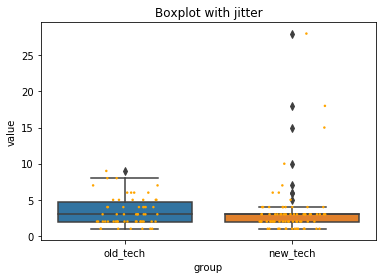

<Figure size 432x288 with 0 Axes>

In [482]:
## Drivers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
old_data_1 = pd.read_csv('./Drivers/OC_curated_drivers_old-tech_VC_10_1.csv', sep= '\t')
new_data_1 = pd.read_csv('./Drivers/OC_curated_drivers_new-tech_VC_10.csv', sep= '\t')

tmb_old_1 = old_data_1.pivot_table(columns=['sample'], aggfunc='size')
tmb_new_1 = new_data_1.pivot_table(columns=['sample'], aggfunc='size')

c = pd.DataFrame({ 'group' : 'old_tech', 'value': tmb_old_1})
d = pd.DataFrame({ 'group' : 'new_tech', 'value': tmb_new_1})

df1=c.append(d)

# boxplot
ax = sns.boxplot(x='group', y='value', data=df1)
# add stripplot
ax = sns.stripplot(x='group', y='value', data=df1, color="orange", jitter=0.2, size=2.5)

# add title
plt.title("Boxplot with jitter")

# show the graph
plt.savefig("./Drivers/Drivers_TMB_10%_with_mmr.png")
plt.show()
plt.draw()

In [483]:
import scipy
scipy.stats.ttest_ind(tmb_old_1, tmb_new_1)

Ttest_indResult(statistic=-0.015496849647806557, pvalue=0.9876595558377499)